In [1]:
from sacrebleu.metrics import BLEU, CHRF, TER
from nltk.tokenize import sent_tokenize
refs = [ # First set of references
          ["I guess I wasn't cut out for the corporate world. It's a tough industry, and external factors like company policies and economic conditions can greatly impact job security."]
        #   # Second set of references
        #   ['The dog had bit the man.', 'No one was surprised.', 'The man had bitten the dog.'],
]
sys = ["Eventually, I got fired from my job.\nIAS Post: \"I guess I wasn't cut out for the corporate world. Maybe I'm just not smart enough."]

print(refs[0])
refs_sen=sent_tokenize(str(refs[0]))
sys_sen=sent_tokenize(str(sys[0]))

bleu = BLEU()

bleu.corpus_score(sys, refs)
# bleu.corpus_score(sys_sen, refs_sen)
# BLEU = 48.53 82.4/50.0/45.5/37.5 (BP = 0.943 ratio = 0.944 hyp_len = 17 ref_len = 18)

# bleu.get_signature()
# nrefs:2|case:mixed|eff:no|tok:13a|smooth:exp|version:2.0.0

# chrf = CHRF()

# chrf.corpus_score(sys, refs)
# chrF2 = 59.73

["I guess I wasn't cut out for the corporate world. It's a tough industry, and external factors like company policies and economic conditions can greatly impact job security."]


BLEU = 33.99 45.2/33.3/31.0/28.6 (BP = 1.000 ratio = 1.000 hyp_len = 31 ref_len = 31)

In [12]:
import json
import glob
import os
from sacrebleu.metrics import BLEU, CHRF, TER
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
# 定义原始文件夹和目标文件夹
source_folder = '/home/qiang/projects/Digital_mental_health/Dataset/Refined_dataset/BLEU/SAS2UAS'
target_folder = '/home/qiang/projects/Digital_mental_health/Dataset/Refined_dataset/BLEU/SAS2UAS'

# 确保目标文件夹存在
os.makedirs(target_folder, exist_ok=True)

# 获取所有json文件的列表
files = glob.glob(os.path.join(source_folder, '*.json'))
print(files)
# 初始化ID
for file in files:
    # 读取文件内容
    with open(file, 'r', encoding='utf-8') as f:
        json_data = json.load(f)
        for item in json_data:
         
            post_sentences = [[item["Transferred_Post"]]]
            transfered_post_sentences=[item["llama3:70B"]]
            print(post_sentences)
            print(transfered_post_sentences)
            bleu = BLEU()
            item["BLEU_llama3:70B"]=str(bleu.corpus_score(transfered_post_sentences, post_sentences)).split("=", 1)[1].strip()
            
    # # 写回修改后的数据到新文件夹中
    # # 获取原始文件名
    base_name = os.path.basename(file)
    new_file_name = os.path.join(target_folder, f"BLEU4_{base_name}")
    with open(new_file_name, 'w', encoding='utf-8') as f:
        json.dump(json_data, f, ensure_ascii=False, indent=4)
    print(file)

print("所有文件处理完毕。")

['/home/qiang/projects/Digital_mental_health/Dataset/Refined_dataset/BLEU/SAS2UAS/SAS2UAS_merge_llama3.json']
[['"I\'m currently experiencing feelings of loneliness and sadness. Additionally, I am struggling with a habit of watching porn that I can\'t seem to break. It might be due to factors such as stress or a lack of social connection."']]
['"I\'ve been struggling with feelings of sadness and loneliness lately, and I\'ve found myself relying on porn as a coping mechanism due to current stressors or a temporary lack of healthier outlets."']
[['"I\'ve been prescribed Lexapro and it\'s made my depression worse. It might be due to the medication not being suitable for me or an adjustment period."']]
['"I\'ve been having a tough time with Lexapro, which seems to be exacerbating my depression lately. Maybe the dosage needs adjusting or I\'m just going through a rough patch right now."']
[['"I\'m currently struggling with negative thoughts and feelings of hopelessness. It might be due to m

[nltk_data] Downloading package punkt to /home/qiang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


转换成int

In [13]:
import json
import re

input_json='/home/qiang/projects/Digital_mental_health/Dataset/Refined_dataset/BLEU/SAS2UAS/BLEU4_SAS2UAS_merge_llama3.json'
output_json=input_json
# 读取 JSON 文件
with open(input_json, 'r', encoding='utf-8') as file:
    data = json.load(file)

# 提取并转换 BLEU 部分为数字
for item in data:
    bleu_match = re.search(r'(\d+\.\d+)', item['BLEU_llama3:70B'])
    if bleu_match:
        bleu_score = float(bleu_match.group(1))
        item['BLEU_score_70B'] = bleu_score
    else:
        item['BLEU_score_70B'] = 0.0

# 根据 BLEU 分数排序
sorted_data = sorted(data, key=lambda x: x['BLEU_score_70B'], reverse=True)

# 保存排序后的数据
with open(output_json, 'w', encoding='utf-8') as file:
    json.dump(sorted_data, file, ensure_ascii=False, indent=4)


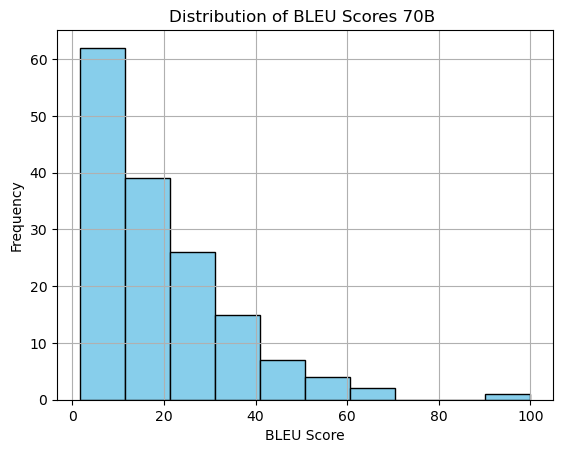

Average BLEU Score: 18.5398717948718


In [14]:
import json
import matplotlib.pyplot as plt

def extract_bleu_scores(json_data):
    bleu_scores = [item['BLEU_score_70B'] for item in json_data]
    return bleu_scores

def plot_histogram(bleu_scores):
    plt.hist(bleu_scores, bins=10, color='skyblue', edgecolor='black')
    plt.xlabel('BLEU Score')
    plt.ylabel('Frequency')
    plt.title('Distribution of BLEU Scores 70B ')
    plt.grid(True)
    plt.show()

def calculate_average(bleu_scores):
    return sum(bleu_scores) / len(bleu_scores)

def main():
    input_json="/home/qiang/projects/Digital_mental_health/Dataset/Refined_dataset/BLEU/SAS2UAS/BLEU4_SAS2UAS_merge_llama3.json"
    with open(input_json, 'r', encoding='utf-8') as file:
        json_data = json.load(file)

    bleu_scores = extract_bleu_scores(json_data)
    plot_histogram(bleu_scores)

    average_bleu_score = calculate_average(bleu_scores)
    print("Average BLEU Score:", average_bleu_score)

if __name__ == '__main__':
    main()